In [1]:
import numpy as np # linear algebra
import pandas as pd # take CSV file

In [2]:
matches=pd.read_csv('matches.csv')
matches.info()
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               816 non-null    int64 
 1   season           816 non-null    int64 
 2   city             809 non-null    object
 3   date             816 non-null    object
 4   team1            816 non-null    object
 5   team2            816 non-null    object
 6   toss_winner      816 non-null    object
 7   toss_decision    816 non-null    object
 8   result           816 non-null    object
 9   dl_applied       816 non-null    int64 
 10  winner           812 non-null    object
 11  win_by_runs      816 non-null    int64 
 12  win_by_wickets   816 non-null    int64 
 13  player_of_match  812 non-null    object
 14  venue            816 non-null    object
 15  umpire1          814 non-null    object
 16  umpire2          814 non-null    object
 17  umpire3          179 non-null    ob

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [3]:
matches[pd.isnull(matches['winner'])] #find null value of winner column

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
241,242,2011,Delhi,21-05-2011,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
486,487,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
511,512,2015,Bangalore,17-05-2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,745,2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [4]:
matches['winner'].fillna('Draw', inplace=True) # updating null values to draw

In [5]:
matches.loc[241,'winner'] # Checking the values

'Draw'

In [6]:
matches.loc[486,'winner']

'Draw'

In [7]:
matches.loc[511,'winner']

'Draw'

In [8]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors','Delhi Capitals']
                ,['MI','KKR','RCB','DCH','CSK','RR','GL','KXIP','SRH','RPS','KTK','PW','DC'],inplace=True)
     #replacing large name to short
    
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,18-04-2008,KKR,RCB,RCB,field,normal,0,KKR,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,19-04-2008,CSK,KXIP,CSK,bat,normal,0,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,19-04-2008,RR,DC,RR,bat,normal,0,DC,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,20-04-2008,MI,RCB,MI,bat,normal,0,RCB,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,20-04-2008,DCH,KKR,DCH,bat,normal,0,KKR,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [9]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DCH':4,'CSK':5,'RR':6,'GL':7,'KXIP':8,'SRH':9,'RPS':10,'KTK':11,'PW':12,'DC':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DCH':4,'CSK':5,'RR':6,'GL':7,'KXIP':8,'SRH':9,'RPS':10,'KTK':11,'PW':12,'DC':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DCH':4,'CSK':5,'RR':6,'GL':7,'KXIP':8,'SRH':9,'RPS':10,'KTK':11,'PW':12,'DC':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DCH':4,'CSK':5,'RR':6,'GL':7,'KXIP':8,'SRH':9,'RPS':10,'KTK':11,'PW':12,'DC':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,18-04-2008,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,19-04-2008,5,8,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,19-04-2008,6,13,6,bat,normal,0,13,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,20-04-2008,1,3,1,bat,normal,0,3,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,20-04-2008,4,2,4,bat,normal,0,2,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [10]:
matches[pd.isnull(matches['city'])]  # find null cities

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
402,403,2014,NaN,19-04-2014,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
403,404,2014,NaN,19-04-2014,2,13,2,bat,normal,0,13,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
407,408,2014,NaN,23-04-2014,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
409,410,2014,NaN,25-04-2014,9,13,9,bat,normal,0,9,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
410,411,2014,NaN,25-04-2014,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
415,416,2014,NaN,28-04-2014,3,8,8,field,normal,0,8,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
417,418,2014,NaN,30-04-2014,9,1,1,field,normal,0,9,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [11]:
del matches['umpire3']

In [12]:
matches['city'].fillna('Dubai International Cricket Stadium',inplace=True)
matches.describe()
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               816 non-null    int64 
 1   season           816 non-null    int64 
 2   city             816 non-null    object
 3   date             816 non-null    object
 4   team1            816 non-null    int64 
 5   team2            816 non-null    int64 
 6   toss_winner      816 non-null    int64 
 7   toss_decision    816 non-null    object
 8   result           816 non-null    object
 9   dl_applied       816 non-null    int64 
 10  winner           816 non-null    int64 
 11  win_by_runs      816 non-null    int64 
 12  win_by_wickets   816 non-null    int64 
 13  player_of_match  812 non-null    object
 14  venue            816 non-null    object
 15  umpire1          814 non-null    object
 16  umpire2          814 non-null    object
dtypes: int64(9), object(8)
memory usage

In [13]:
xx=matches.groupby(["toss_winner"]).size()
print(xx._get_value(1))
yy=matches.groupby(["winner"]).size()
print(yy._get_value(1))

106
120


In [14]:
#maintain a dictionary for future reference mapping teams
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
MI


In [15]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(5)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,8,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5
2,6,13,Delhi,bat,6,Feroz Shah Kotla,13
3,1,3,Mumbai,bat,1,Wankhede Stadium,3
4,4,2,Kolkata,bat,4,Eden Gardens,2


In [16]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,816.000000,816.00000,816.000000,816.000000
mean,5.865196,6.02451,5.879902,5.693627
std,3.791041,3.92405,3.861757,3.804970
min,1.000000,1.00000,1.000000,1.000000
25%,3.000000,3.00000,2.750000,2.000000
50%,5.000000,5.00000,5.000000,5.000000
75%,8.000000,9.00000,8.000000,8.000000
max,13.000000,13.00000,13.000000,14.000000


In [17]:
df["city"].unique() #all 31 cities

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai International Cricket Stadium',
       'Rajkot', 'Kanpur', 'Mohali', 'Bengaluru'], dtype=object)

In [18]:
df["venue"].unique() #all 35 venues

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [19]:
cat_list=df["city"]
encoded_data, mapping_index = pd.Series(cat_list).factorize() #to get numeric representation of array (Series is 1-D array holding data of any type)
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  3  1  0  4  2  6  5  7  6  1  3  5
  0  7  3  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  3  8  8  8  8  9 10  8 10  8 10 10  9  8 10
  9 11 10 10 11 11 12 10  9 13  9 13 12 10 10 11 11 11 12 14 14  9 13 14
 11 11 10 10 10 15  9 13 13 15 11 13 10 10 11 11 11 13 13  3  3  1  4  7
 16  0  4  2  0  2 17 16  3 17  7  3  0  1  3 16  1  0 16  3  2  3  7  2
  4  1  7  3  4  2 18  7  5  4  0  1 18  0  2  5 18  3  7  5  7 19  0  4
 19  2  4  3  3  3  3  7  6 20  2  3  4  5  0  1  3  6  5  3  7  6  3  4
 20  2  3  4  1  3  4  2  6  5  7  2  3 20  2  5  0 20  4  5  7  3  2  6
  7  3 20  6  0  4  3  0  1  5  6  1  5  7 21  0  3 19 21  3 19  7  3  3
 19  2  0  4  3  3  7  7  7  4  3  5  0 22  5 23 22  0  2  3  7  1  4  2
 23  4  0  3  5  0  1  6  7  1  7  2  3 17  5 23  1 23  2  7  4  2  3  7
 17  5  0 23  7  4  1  3  0  2 23  6  3  5 23  4  7  5  1  0  4  2  3 19
  2  6 19 23  6  5 23  0  7  7  4  0  6  2  7 23  6

In [20]:
cat_list1=df["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  8  1  0  4  2  6  5  7  6  1  8  5
  0  7  8  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  8  9  9  9  9 10 11  9 11  9 11 11 10  9 11
 10 12 11 11 12 12 13 11 10 14 10 14 13 11 11 12 12 12 13 15 15 10 14 15
 12 12 11 11 11 16 10 14 14 16 12 14 11 11 12 12 12 14 14  8 17  1  4  7
 18  0  4  2  0  2 19 18 17 19  7 17  0  1 17 18  1  0 18  8  2 17  7  2
  4  1  7 17  4  2 20  7  5  4  0  1 20  0  2  5 20 17  7  5  7 21  0  4
 21  2  4  8  8  8  8  7  6 22  2  8  4  5  0  1  8  6  5  3  7  6  8  4
 22  2  3  4  1  3  4  2  6  5  7  2  8 22  2  5  0 22  4  5  7  3  2  6
  7  8 22  6  0  4  3  0  1  5  6  1  5  7 23  0  3 21 23  8 21  7  8  3
 21  2  0  4  3  3  7  7  7  4  3  5  0 24  5 25 24  0  2  3  7  1  4  2
 25  4  0  3  5  0  1  6  7  1  7  2  3 19  5 25  1 25  2  7  4  2  3  7
 19  5  0 25  7  4  1  3  0  2 25  6  3  5 25  4  7  5  1  0  4  2  3 21
  2  6 21 25  6  5 25  0  7  7  4  0  6  2  7 25  6

In [21]:
cat_list2=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))

[0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0
 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0
 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 1 

In [22]:
#Find some stats on the match winners and toss winners
temp1=df['toss_winner'].value_counts(sort=True) #gives count of unique values in descending order
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')

for idx, val in temp1.iteritems():
    print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
    print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 106
DC -> 100
KKR -> 98
CSK -> 97
RR -> 87
RCB -> 87
KXIP -> 85
SRH -> 57
DCH -> 43
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 120
CSK -> 106
KKR -> 99
RCB -> 91
KXIP -> 88
DC -> 86
RR -> 81
SRH -> 66
DCH -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 4


<AxesSubplot:>

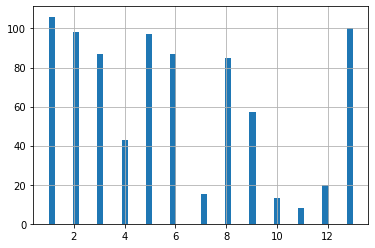

In [23]:
df['toss_winner'].hist(bins =50)

<AxesSubplot:>

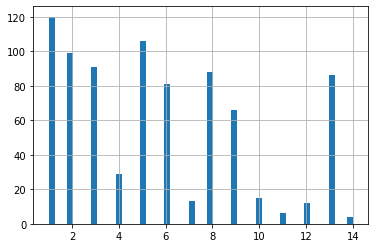

In [24]:
#shows that Mumbai won most matches followed by Chennai
df['winner'].hist(bins=50)

Text(0.5, 1.0, 'Match winners')

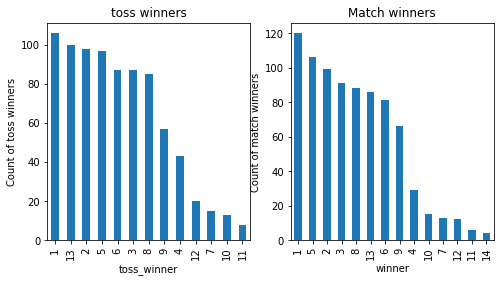

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

In [26]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [27]:
#Find cities which are null
df[pd.isnull(df['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [28]:
df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,8,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5
2,6,13,Delhi,bat,6,Feroz Shah Kotla,13
3,1,3,Mumbai,bat,1,Wankhede Stadium,3
4,4,2,Kolkata,bat,4,Eden Gardens,2
...,...,...,...,...,...,...,...
811,9,1,Sharjah,field,9,Sharjah Cricket Stadium,9
812,13,1,Dubai International Cricket Stadium,field,13,Dubai International Cricket Stadium,1
813,3,9,Abu Dhabi,field,9,"Sheikh Zayed Stadium, Abu Dhabi",9
814,13,9,Abu Dhabi,bat,13,"Sheikh Zayed Stadium, Abu Dhabi",13


In [29]:
#building predictive model , convert categorical to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,17,2
1,5,8,7,0,5,27,5
2,6,13,10,0,6,9,13
3,1,3,24,0,1,41,3
4,4,2,22,0,4,8,2
...,...,...,...,...,...,...,...
811,9,1,31,1,9,34,9
812,13,1,12,1,13,7,1
813,3,9,0,1,9,36,9
814,13,9,0,0,13,36,13


In [30]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
      model.fit(data[predictors],data[outcome].values.ravel())
      predictions = model.predict(data[predictors])
      print(predictions)
      accuracy = metrics.accuracy_score(predictions,data[outcome])
      print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

In [31]:
#logistic Regression
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

[ 3  5 13  1  2  6 13  3  1  3  3  5  2 13  5  1  8  3  1 13  1  6 13  6
  3  3  2  8  2  1  3  3  1  8  5 13  1  8  8  1 13  1  1  2 13  2  1  5
  3 13  5  3  2  1  5  6  6  2  3  5 13  5  1  2  5 13  3  5  1  5  5  3
  1  6  1  5  6  6  2  5  1 13  1  1  5  8 13  1  3  6 13  2  5  1 13  5
  1  6  8  5  1  8  1  1  2 13  6  6  2  5  6  6  8  1  1  2  2 13  2  5
 13  5  2 13  3 13  3  6  2 13  8  2  3  8  2  6  5 14  6  2 13  2  5 13
  2  6  5  2  5 13  1  1  6 13  3  5  1  3 13  1  1 13  5  1 13  3  3  2
  8 13  1  2  2  2  2  5  1  5  5 13  2  6  3  3 13  1  1  1  5  3 13  2
  8 13  6  2  8  1  2 13  1  8 13  8 13  8 13  1 13 13  2  8  5  1 13  1
  5  2  2 13  3  2  1 14 13  1 13  3  1 13 13  3  1 13 13  2  5 13  2  1
  3 13  3  2  1  1  3  5  3 13  6  8 13  2  1  6  2  3 13  1  5  8  2 13
  6  2  5  1  5 14  6 13 13  3  5 13  1  2  1 13  6  6  8  5  2 13  1  5
 13 13  3  5  5 13  5  1  3 13  6  8  1  1  1  1  8 13  5  3  2 13  1  3
 13  6 13  5  1  1  5  3 13  5  2  3 13 13  5  6  5

C:\Users\Shubham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
#applying knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)

[ 3  5 13  1  2  6 13  5  6  8  3  5  1  8  5  1  3  8  6 13  4  1  1  6
  8  5  1  5  2  6  1  5  2  6  8  2  1  8  3  1  8  2  1  5  3  6  8  5
  8  1  5  3  2  6  3  1  5  3  1  1 13  4  4  2  4  5  4  3  3  2  7  2
  1 13  4  3 13  5  3  3  5  5  5  4  3  5  3  2  5  5 13  4  4  1  4  4
  3  1  2  3  3  8  1  4  3  8  2  3  2  3 13  3  1  4  4  1  1 13  2  3
 13  3  2  1  3 13  4  6  1  4  5  1  3  8  1  6  1  3  6  1  2  1  5 13
  2  2  5  1  2  2  4  1  6  2  3  1  4  3  8  6  4  2  5  6 13  4  1  2
  4  4  2  1  3  5  5  2  6  3  1 12  2  6  1  8 12  4  2  1  5  8 12  2
  4  4  1  2  8  5  2  8  1  6  5  3  2  4  1  6  3 13  2  6  5  1 10  1
  5  1  2 13  8  2 13  3  9  6 13  8  2 13  8  3  1  8  8  2  4 13  2  1
  4 12  3  1  5  1  1  5  5 13 10  6  3  1  2  6  1  3 13  1  5  8  2  4
  4  2  3 13  6  3  1 13  5  8  5 11  1  2  6  9  1  3 13  5  2 13  1  2
  4  6  8  2  5  2  6  1  3  2  6  9  1  5  1  2  5  6  8  1  5 13  1  4
  3  3  8  2  4  6  2  1  5  2  2  1  9 13  5  6  9

In [33]:
#Import Library
from sklearn import svm
model = svm.SVC(kernel='rbf', C=1, gamma=1) 
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)


[ 3  5 13  1  2  6 13  5  6  8  6  5  1  8  5  1  3  8  6  5  3  8  1  6
  3  4  1  5  2  6  1  5  2  6  8  2  1  8 13  1  8  6  1  5  3  6  8  5
  8  1  5  3  2  6  5  6  5  6  1  3 13  4  5  2  4 13  6  3  4 13  8  4
  1  6  3  8 13  5  1  3  6  5  8  3  5  6 13  4  6  5 13  8  5  1 13  4
  3  1 13  3  6  8  5  4  8 13  2  3  2  5 13  3  4  3  4  2  1 13  2  4
 13  3  2  1  3  5  4  6  3  4  8  1  3  6  1  6  2  3  6  1  2  1  5 13
  2  3  5  1  8 13  6  5  6  2  3  1  4  3  8  6  4  1  5  6  5  4  1  2
  5  4  1  1  5  3  5  2  6  3 13 12  2  6  1  8 12  4  2 11  5  8 13  2
  1  4  1 11  8  1  3  8  1  6  5  3  5  4  2  6  3 13  2  6  5  1 11  2
  5  1 11 13  3  2  1  3 12  6 13  8  6  5  8  3  4  8 11  4  8  5  2  6
  4 14  3  1  5  1  3  5  5 13 13  6  3  5  2  8  1  3 13  1  5  8  2  4
  5  2  6  1  6  3  8 13  5  8  5 12  1  2  6 13  1  4 13  8  2 13  1  2
  4 13  3  1  5  2  6  1  3  2  6  8  1  5  3  1  5  6  8  1  5 13  1  8
  3  4  8  2  4  6  2  5  5  2  2  1  9 13  1  8  9

In [34]:
#Decision tree algorithm
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  6  1  2  6 13  1  6  8  6  5  1  8  5  1  3  8  6  5  3  2  1  6
  3  4  1  5  2  6  1  5  2  6  8  2  1  8 13  1  8  3  1  5  3  6  8  5
  8  1  5  3  2  6  5  6  5  6  1  3 13  4  5  2  4 13  6  3  4 13  8  4
  1  6  3  8 13  5  1  3  6  5  8  3  5  6 13  4  6  5 13  8  5  1 13  4
  3  1 13  3  6  8  5  4  8 13  2  3  2  5 13  3  4  3  4  2  1 13  2  4
  6  3  2  1  3  5  4  6  3  4  8  1  3  6  1  6  2  3  6  1  2  1  5 13
  2  3  5  1  8 13  6  1  6  2  3  1  4  3  8  6  4  1  5  3  5  4  1  2
  5  4  1  1  5  3  5  2  6  3  1 12  2  6  1  8 12  4  2 11  5  8 13  2
 11  4  1 11  8  1  3  8  1  6  5  3  5  4  2  6  3 13  2  6  5  1 11  2
  5  1 11 13  3  2  1  3 12  5 12  8  3  5  8  3  4  8 11  4  8  5  2  6
  4 14  3  1  5  1  3  5  1 13 12  6  3  5  2  8  1  3 13  1  5  8  2  4
  5  2  6  1  6  3  2 13  5  3  5 12  1  2  6 12  1  4 13  8  2 13  1  2
  4 13  3  1  5  2  6  1  3  2  6  8  1  5  3  1  5  6  8  1  5 13  1  8
  3  4  8  2  4  1  2  5  5  2  2  1  9  6  1  8  9

In [35]:
#Random forest classifier
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

[ 3  5 13  1  2  6 13  5  6  8 14  5  1  8  5  1  3  8  6 13  3  2  1  6
  8  4  1  5  2  6  1  5  2  6  8  2  1  8 13  1  8  3  1  5 13  6  8  5
  8  1  5  3  2  6  5  6  5  6  1  3 13  4  5  2  4 13  6  8  4 13  8  4
  1  6  3  8 13  5  1  8  6  5  8  3  5  6 13  4  6  5 13  8  5  1 13  4
  3  1 13  3  6  8  5  4  8 13  2  3  2  5 13  3  4  3  4  2  1 13  2  4
 13  3  2  1  3  5  4  6  3  4  8  1  3  6  1  6  2  3  6  1  2  1  5 13
  2  3  5  1  8 13  6  1  6  2  3  1  4  3  8  6  4  1  5  6 13  4  1  2
  5  4  1  1  5  3  5  2  6  3 13 12  2  6  1  8 12  4  2 11  5  8 13  2
 11  4  1 11  8  1  3  8  1  6  5  3  5  4  2  6  3 13  2  6  5  1 11  2
  5  1 11 13  8  2  1  3 12  6 12  8  3 13  8  3  4  8 11  4  8  5  2  6
  4 14  3  1  5  1  3  5  5 13 12  6 13  5  2  8  1  3 13  1  5  8  2  4
  5  2  6  1  6  3  2 13  5  3  5 12  8  2  6 12  1  4 13  8  2 13  1  2
  4 13  8  1  5  2  6  1  3  2  6  8  1  5  3  1  5  6  8  1  5 13  1  8
  3  4  8  2  4  6  2  5  5  2  2  1  9 13  1  8  9

In [36]:
test=pd.read_csv("test.csv")
test.head(10)

,team1,team2,city,toss_winner,venue,toss_decision,date,winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR
2,KKR,MI,3,MI,3,0,5-May,MI
3,CSK,MI,7,CSK,7,1,7-May,MI
4,DC,CSK,22,CSK,24,1,10-May,CSK


In [37]:
test = test.drop(["date","winner"], axis=1,inplace=False)

In [38]:
test.replace(encode, inplace=True)
test.head(7)

,team1,team2,city,toss_winner,venue,toss_decision
0,8,1,3,1,3,0
1,9,6,5,6,5,0
2,2,1,3,1,3,0
3,5,1,7,5,7,1
4,13,5,22,5,24,1


In [39]:
out = model.predict(test)

In [40]:
predicted_winner=[]
for i in out:
    #print(list(dicVal.keys())[list(dicVal.values()).index(i)])
    predicted_winner.append(list(dicVal.keys())[list(dicVal.values()).index(i)])

In [41]:
ipl=pd.read_csv('test.csv')
ctr=0
k=0
total=len(ipl['winner'])
for i in ipl['winner']:
    if i==predicted_winner[k]:
        ctr=ctr+1
    k=k+1  
print(ctr)
print("Accuracy of our prediction of recent IPL is ", ctr/total)

4
Accuracy of our prediction of recent IPL is  0.8


In [42]:
predicted_winner

['MI', 'RR', 'MI', 'CSK', 'CSK']

In [43]:
sub = pd.DataFrame()
sub['team1'] = ipl['team1']
sub['team2'] = ipl['team2']
sub['venue'] = ipl['venue']
sub['toss_winner'] =ipl['toss_winner']
sub['city'] = ipl['city']
sub['toss_decision'] = ipl['toss_decision']
sub['date of match']=ipl['date']
sub['actual_winner']=ipl["winner"]
sub['Predicted_winner'] = predicted_winner
sub.to_csv('ipl2.csv',index=False)

In [44]:
sub.head(10)

,team1,team2,venue,toss_winner,city,toss_decision,date of match,actual_winner,Predicted_winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR,RR
2,KKR,MI,3,MI,3,0,5-May,MI,MI
3,CSK,MI,7,CSK,7,1,7-May,MI,CSK
4,DC,CSK,24,CSK,22,1,10-May,CSK,CSK


In [45]:
print(mapping_index1.get_loc("Sheikh Zayed Stadium, Abu Dhabi"))

41


In [46]:
print(mapping_index.get_loc("Abu Dhabi"))

26


In [47]:
#important factors in determining winners 
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(imp_input)

team2            0.247477
team1            0.221606
venue            0.172618
toss_winner      0.165156
city             0.157950
toss_decision    0.035193
dtype: float64
